# Exploring Aspects

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import squarify


In [13]:
df = pd.read_csv("aspect_sentiment_analysis.csv")
df

,review_id,aspect,sentiment_label,sentiment_score
0,1,experience,positive,0.992996
1,1,option,positive,0.996902
2,1,technology,positive,0.998094
3,2,service,positive,0.998194
4,2,hotel,positive,0.998346
...,...,...,...,...
19009,6775,place,positive,0.994357
19010,6776,receptionist,negative,0.951194
19011,6776,visitor,negative,0.654478
19012,6776,water,negative,0.887671


In [14]:
# Group by aspect and count occurrences
aspect_counts = df['aspect'].value_counts().reset_index()
aspect_counts.columns = ['aspect', 'count']

# Prepare data for mosaic plot
data_dict = aspect_counts.set_index('aspect')['count'].to_dict()

data_dict
# # Plot mosaic
# plt.figure(figsize=(10, 6))
# mosaic(data_dict, title='Aspect Frequency', label_rotation=45)
# plt.show()

{'place': 1015,
 'room': 838,
 'location': 570,
 'staff': 504,
 'service': 483,
 'experience': 472,
 'time': 468,
 'view': 429,
 'bathroom': 358,
 'facility': 346,
 'water': 314,
 'price': 308,
 'hotel': 283,
 'area': 279,
 'cabin': 241,
 'tapi': 214,
 'person': 186,
 'floor': 184,
 'stay': 179,
 'atmosphere': 166,
 'thing': 163,
 'acces': 155,
 'food': 150,
 'city': 140,
 'toilet': 138,
 'pod': 136,
 'road': 130,
 'space': 119,
 'bobobox': 111,
 'accommodation': 90,
 'lot': 83,
 'bed': 82,
 'window': 81,
 'concept': 79,
 'parking': 79,
 'guest': 78,
 'receptionist': 77,
 'light': 76,
 'hour': 75,
 'door': 74,
 'wifi': 74,
 'air': 72,
 'day': 71,
 'bobocabin': 67,
 'one': 65,
 'shower': 63,
 'sok': 62,
 'choice': 61,
 'breakfast': 56,
 'cleanlines': 55,
 'employee': 54,
 'mattres': 53,
 'sound': 53,
 'night': 52,
 'child': 51,
 'kitchen': 50,
 'technology': 49,
 'car': 48,
 'sleep': 48,
 'check': 46,
 'traveler': 44,
 'ini': 44,
 'smell': 44,
 'way': 44,
 'forest': 43,
 'towel': 42,
 '

In [15]:
aspect_counts.tail(10)

,aspect,count
1916,recomend,1
1917,bill,1
1918,permit,1
1919,blend,1
1920,stres,1
1921,ill,1
1922,pine,1
1923,carpark,1
1924,presentation,1
1925,suitcasebag,1


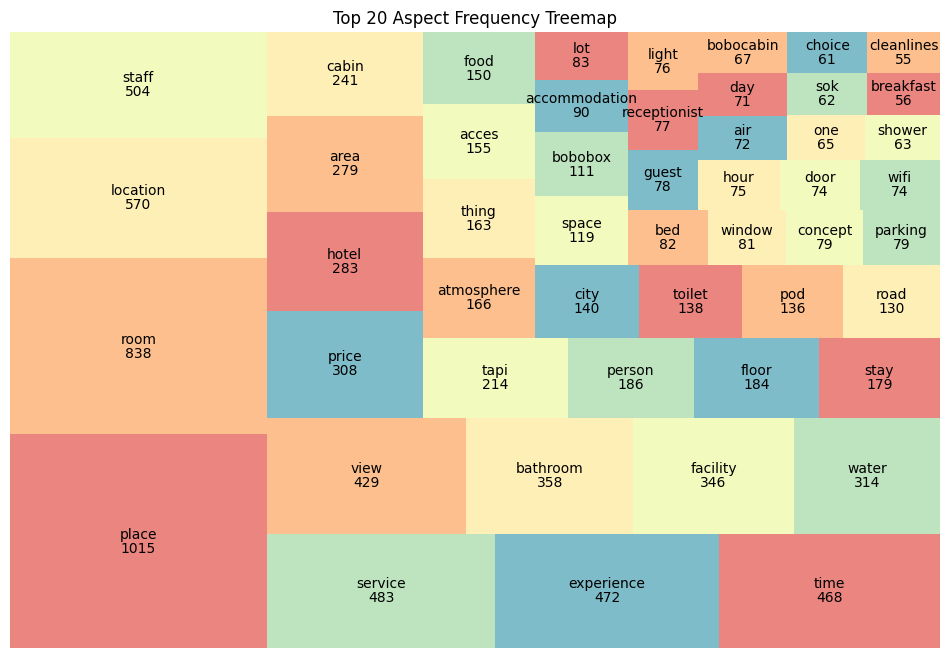

In [16]:
# Group by aspect and count occurrences
aspect_counts = df['aspect'].value_counts().reset_index()
aspect_counts.columns = ['aspect', 'count']

# Select top 10 aspects
top_aspects = aspect_counts.head(50)

# Prepare data for treemap
labels = top_aspects['aspect']
sizes = top_aspects['count']

# Plot treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, value = sizes, alpha=0.7, color=sns.color_palette("Spectral"))
plt.title('Top 20 Aspect Frequency Treemap')
plt.axis('off')
plt.show()

# Try to simplify aspects


In [17]:
import pandas as pd
import spacy
import numpy as np
from transformers import AutoTokenizer, AutoModel, pipeline, AutoModelForSequenceClassification
import torch
from sklearn.cluster import KMeans
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F

C:\Users\Muhammad Harun A\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


       review_id        aspect sentiment_label  sentiment_score  \
0              1    experience        positive         0.992996   
1              1        option        positive         0.996902   
2              1    technology        positive         0.998094   
3              2       service        positive         0.998194   
4              2         hotel        positive         0.998346   
...          ...           ...             ...              ...   
19009       6775         place        positive         0.994357   
19010       6776  receptionist        negative         0.951194   
19011       6776       visitor        negative         0.654478   
19012       6776         water        negative         0.887671   
19013       6776          wifi        positive         0.595912   

       aspect_cluster  
0                   2  
1                   3  
2                   3  
3                   3  
4                   0  
...               ...  
19009               2  
190

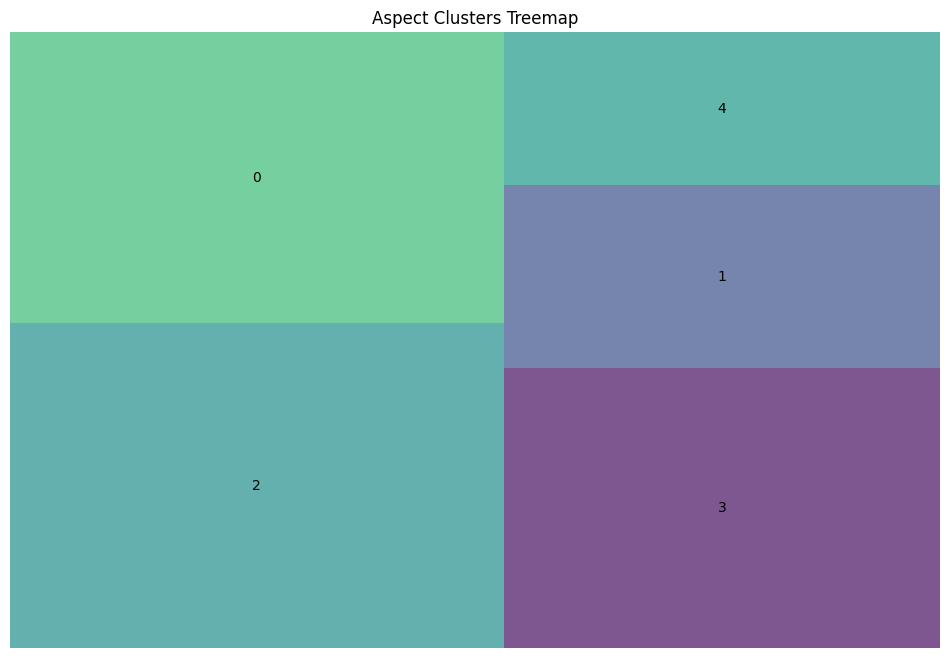

In [18]:
from gensim.downloader import load
import numpy as np
from sklearn.cluster import KMeans

# Load pre-trained word vectors (GloVe or Word2Vec)
word_vectors = load('glove-wiki-gigaword-300')  # You can use different pre-trained models here

# Function to get word vector
def get_word_vector(word):
    if word in word_vectors:
        return word_vectors[word]
    else:
        return np.zeros(300)

# Get unique aspects
unique_aspects = df['aspect'].unique()

# Get word vectors for each aspect
aspect_vectors = np.array([get_word_vector(aspect) for aspect in unique_aspects])

# Perform K-Means clustering
num_clusters = 5  # You can change this number based on your requirements
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(aspect_vectors)
labels = kmeans.labels_

# Create a mapping of aspects to their clusters
aspect_cluster_mapping = {aspect: labels[i] for i, aspect in enumerate(unique_aspects)}

# Add cluster information to the DataFrame
df['aspect_cluster'] = df['aspect'].map(aspect_cluster_mapping)

# Display the DataFrame with cluster information
print(df)

# Visualize the clusters using a treemap
cluster_counts = df['aspect_cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'count']

# Prepare data for treemap
labels = cluster_counts['cluster']
sizes = cluster_counts['count']

# Plot treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.7)
plt.title('Aspect Clusters Treemap')
plt.axis('off')
plt.show()

In [19]:
df[df.aspect_cluster == 4].iloc[:20]

,review_id,aspect,sentiment_label,sentiment_score,aspect_cluster
16,8,mat,positive,0.972082,4
22,11,menu,positive,0.998353,4
44,33,oxygen,positive,0.896094,4
70,41,couch,negative,0.819141,4
85,46,water,positive,0.992241,4
118,58,water,positive,0.995722,4
120,58,rice,positive,0.990927,4
139,68,water,positive,0.984038,4
152,77,rice,positive,0.975178,4
158,77,chicken,positive,0.971561,4


In [20]:
df[df.aspect == 'cot']

,review_id,aspect,sentiment_label,sentiment_score,aspect_cluster


       review_id        aspect sentiment_label  sentiment_score  \
0              1    experience        positive         0.992996   
1              1        option        positive         0.996902   
2              1    technology        positive         0.998094   
3              2       service        positive         0.998194   
4              2         hotel        positive         0.998346   
...          ...           ...             ...              ...   
19009       6775         place        positive         0.994357   
19010       6776  receptionist        negative         0.951194   
19011       6776       visitor        negative         0.654478   
19012       6776         water        negative         0.887671   
19013       6776          wifi        positive         0.595912   

       aspect_cluster mapped_aspect  
0                   2    Atmosphere  
1                   3         Worth  
2                   3       Service  
3                   3       Service  
4    

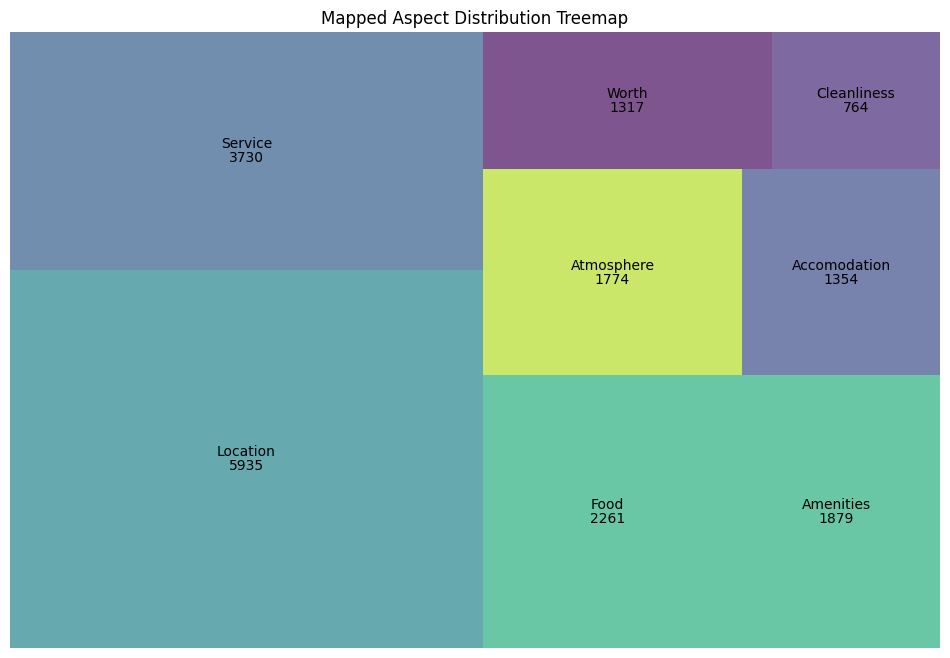

In [21]:
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors
from gensim.downloader import load
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained word vectors (GloVe or Word2Vec)
# word_vectors = load('word2vec-google-news-300')  # You can use different pre-trained models here
word_vectors = load('glove-wiki-gigaword-300')  # You can use different pre-trained models here

# Function to get word vector
def get_word_vector(word):
    if word in word_vectors:
        return word_vectors[word]
    else:
        return np.zeros(300)

# Define the predefined aspects
predefined_aspects = ['Accomodation', 'Amenities', 'Atmosphere', 'Cleanliness', 'Worth', 'Location', 'Food', 'Service']

# Get vectors for predefined aspects
predefined_vectors = np.array([get_word_vector(aspect.lower()) for aspect in predefined_aspects])

# Function to find the closest predefined aspect
def map_to_predefined_aspect(aspect, predefined_aspects, predefined_vectors):
    aspect_vector = get_word_vector(aspect.lower())
    similarities = cosine_similarity([aspect_vector], predefined_vectors)
    closest_index = np.argmax(similarities)
    return predefined_aspects[closest_index]

# Map each aspect to the closest predefined aspect
df['mapped_aspect'] = df['aspect'].apply(lambda x: map_to_predefined_aspect(x, predefined_aspects, predefined_vectors))

# Display the DataFrame with mapped aspects
print(df)

# Save the processed DataFrame to CSV for further analysis
df.to_csv('aspect_sentiment_analysis_mapped.csv', index=False)

# Visualize the distribution of the mapped aspects
import matplotlib.pyplot as plt
import seaborn as sns

aspect_counts = df['mapped_aspect'].value_counts().reset_index()
aspect_counts.columns = ['aspect', 'count']

# Plot treemap
import squarify

plt.figure(figsize=(12, 8))
squarify.plot(sizes=aspect_counts['count'], label=aspect_counts['aspect'], alpha=0.7, value=aspect_counts['count'])
plt.title('Mapped Aspect Distribution Treemap')
plt.axis('off')
plt.show()


       review_id        aspect sentiment_label  sentiment_score  \
0              1    experience        positive         0.992996   
1              1        option        positive         0.996902   
2              1    technology        positive         0.998094   
3              2       service        positive         0.998194   
4              2         hotel        positive         0.998346   
...          ...           ...             ...              ...   
19009       6775         place        positive         0.994357   
19010       6776  receptionist        negative         0.951194   
19011       6776       visitor        negative         0.654478   
19012       6776         water        negative         0.887671   
19013       6776          wifi        positive         0.595912   

       aspect_cluster mapped_aspect  
0                   2          Room  
1                   3       Service  
2                   3       Service  
3                   3       Service  
4    

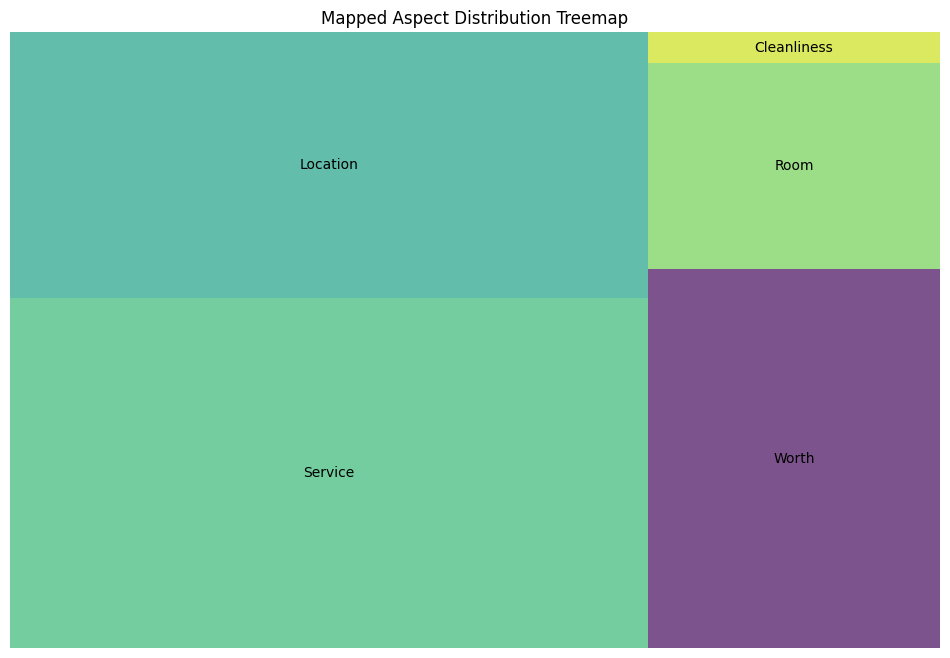

In [11]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# Load BERT model and tokenizer
bert_model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(bert_model_name)
model = BertModel.from_pretrained(bert_model_name)

# Function to get word embedding using BERT
def get_bert_embedding(word):
    inputs = tokenizer(word, return_tensors='pt')
    outputs = model(**inputs)
    # Use the embeddings of the [CLS] token
    return outputs.last_hidden_state[:, 0, :].detach().numpy().flatten()

# Define the predefined aspects
predefined_aspects = ['Room', 'Location', 'Service', 'Cleanliness', 'Worth']

# Get vectors for predefined aspects
predefined_vectors = np.array([get_bert_embedding(aspect.lower()) for aspect in predefined_aspects])

# Function to find the closest predefined aspect
def map_to_predefined_aspect(aspect, predefined_aspects, predefined_vectors):
    aspect_vector = get_bert_embedding(aspect.lower())
    similarities = cosine_similarity([aspect_vector], predefined_vectors)
    closest_index = np.argmax(similarities)
    return predefined_aspects[closest_index]

# Map each aspect to the closest predefined aspect
df['mapped_aspect'] = df['aspect'].apply(lambda x: map_to_predefined_aspect(x, predefined_aspects, predefined_vectors))

# Display the DataFrame with mapped aspects
print(df)

# Save the processed DataFrame to CSV for further analysis
df.to_csv('aspect_sentiment_analysis_mapped.csv', index=False)

# Visualize the distribution of the mapped aspects
aspect_counts = df['mapped_aspect'].value_counts().reset_index()
aspect_counts.columns = ['aspect', 'count']

# Plot treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=aspect_counts['count'], label=aspect_counts['aspect'], alpha=0.7)
plt.title('Mapped Aspect Distribution Treemap')
plt.axis('off')
plt.show()

In [38]:
# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")

# Load ABSA model
absa_tokenizer = AutoTokenizer.from_pretrained("yangheng/deberta-v3-base-absa-v1.1")
absa_model = AutoModelForSequenceClassification.from_pretrained("yangheng/deberta-v3-base-absa-v1.1")

# Load BERT model for embeddings
embedding_model_name = "bert-base-uncased"
embedding_tokenizer = AutoTokenizer.from_pretrained(embedding_model_name)
embedding_model = AutoModel.from_pretrained(embedding_model_name)

# Function to generate embeddings
def generate_embeddings(text):
    inputs = embedding_tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = embedding_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

aspects = ['Room', 'Location', 'Service', 'Cleanliness', 'Price']

# Generate embeddings for aspects
aspect_embeddings = {aspect: generate_embeddings(aspect) for aspect in aspects}

NameError: name 'spacy' is not defined

In [ ]:
# Prepare data for clustering
X = np.array(list(aspect_embeddings.values()))

# Perform K-Means clustering
n_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Create cluster mapping
cluster_mapping = {}
for idx, label in enumerate(kmeans.labels_):
    if label not in cluster_mapping:
        cluster_mapping[label] = []
    cluster_mapping[label].append(list(aspect_embeddings.keys())[idx])

# Define simplified aspects for each cluster
simplified_aspects = {
    0: "Room",
    1: "Location",
    2: "Service",
    3: "Cleanliness",
    4: "Price"
    # Add more simplified aspects based on your clusters
}

# Print cluster mapping
for label, terms in cluster_mapping.items():
    print(f"Cluster {label} ({simplified_aspects[label]}): {terms}")

In [ ]:
def truncate_sentence(sentence, max_length=512):
    tokens = sentence.split()
    if len(tokens) > max_length:
        return ' '.join(tokens[:max_length])
    return sentence

def simplify_aspect_using_clusters(aspect, cluster_mapping, simplified_aspects):
    for label, terms in cluster_mapping.items():
        if aspect in terms:
            return simplified_aspects[label]
    return aspect

def analyze_aspect_sentiment(sentence, aspect):
    inputs = absa_tokenizer(f"[CLS] {sentence} [SEP] {aspect} [SEP]", return_tensors="pt")
    outputs = absa_model(**inputs)
    probs = F.softmax(outputs.logits, dim=1)
    probs = probs.detach().numpy()[0]
    return {label: prob for label, prob in zip(["negative", "neutral", "positive"], probs)}


# Update the aspect extraction function to use the cluster-based mapping
def process_reviews_with_clusters(df, text_column, aspects, cluster_mapping, simplified_aspects):
    results = []
    for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing reviews"):
        sentence = row[text_column]
        truncated_sentence = truncate_sentence(sentence)
        for aspect in aspects:
            simplified_aspect = simplify_aspect_using_clusters(aspect, cluster_mapping, simplified_aspects)
            sentiment_scores = analyze_aspect_sentiment(truncated_sentence, simplified_aspect)
            highest_sentiment_label = max(sentiment_scores, key=sentiment_scores.get)
            highest_sentiment_score = sentiment_scores[highest_sentiment_label]
            results.append({
                'review_id': row['review_id'],  # Assuming you have a review_id column
                'aspect': simplified_aspect,
                'sentiment_label': highest_sentiment_label,
                'sentiment_score': highest_sentiment_score
            })
    return pd.DataFrame(results)

# Process the DataFrame with clustered aspects
processed_df = process_reviews_with_clusters(df, 'clean_text', aspects, cluster_mapping, simplified_aspects)

# Display the processed DataFrame
print(processed_df.head())

# Save the processed DataFrame to CSV for further analysis
processed_df.to_csv('aspect_sentiment_analysis_with_clusters.csv', index=False)

# Visualization of aspect sentiment scores
plt.figure(figsize=(12, 8))
sns.barplot(data=processed_df, x='aspect', y='sentiment_score', hue='sentiment_label', ci=None)
plt.title('Aspect-Based Sentiment Scores')
plt.xticks(rotation=45)
plt.xlabel('Aspect')
plt.ylabel('Sentiment Score')
plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.show()